## Data from World Happiness Report

The World Happiness Report is an annual publication of the United Nations Sustainable Development Solutions Network. It contains articles, and rankings of national happiness based on respondent ratings of their own lives, which the report also correlates with various life factors.

In this notebook we will explore the happiness of different countries and the features associated.
The datasets that we will use are available in *Data*: **happiness2020.pkl** and **countries_info.csv**.

Although the features are self-explanatory, here a summary: 

**happiness2020.pkl**
* country: *Name of the country*
* happiness_score: *Happiness score*
* social_support: *Social support (mitigation the effects of inequality)*
* healthy_life_expectancy: *Healthy Life Expectancy*
* freedom_of_choices: *Freedom to make life choices*
* generosity: *Generosity (charity, volunteers)*
* perception_of_corruption: *Corruption Perception*
* world_region: *Area of the world of the country*

**countries_info.csv**
* country_name: *Name of the country*
* area: *Area in sq mi*
* population: *Number of people*
* literacy: *Literacy percentage*

In [110]:
!head Data/countries_info.csv

'head' is not recognized as an internal or external command,
operable program or batch file.


In [111]:
import pandas as pd
%matplotlib inline

DATA_FOLDER = 'Data/'

HAPPINESS_DATASET = DATA_FOLDER+"happiness2020.csv"
COUNTRIES_DATASET = DATA_FOLDER+"countries_info.csv"

## Task 1: Load the data

Load the 2 datasets in Pandas dataframes (called *happiness* and *countries*), and show the first rows.


**Hint**: Use the correct reader and verify the data has the expected format.

In [112]:
# Write your code here
happiness = pd.read_csv(HAPPINESS_DATASET)
countries = pd.read_csv(COUNTRIES_DATASET, decimal=',')
#print(happiness.head())
#print(countries.head())
"""U 1st capitalize, then sort the two together to ensure they have perfectly the same values, then you can merge!"""
happiness.country = happiness.country.str.capitalize() 
countries.country_name = countries.country_name.str.capitalize()
happiness.sort_values(by='country')
countries.sort_values(by='country_name')
print(happiness.head())
print(countries.head())

       country  happiness_score  social_support  healthy_life_expectancy  \
0  Afghanistan           2.5669        0.470367                52.590000   
1      Albania           4.8827        0.671070                68.708138   
2      Algeria           5.0051        0.803385                65.905174   
3    Argentina           5.9747        0.900568                68.803802   
4      Armenia           4.6768        0.757479                66.750656   

   freedom_of_choices  generosity  perception_of_corruption  \
0            0.396573   -0.096429                  0.933687   
1            0.781994   -0.042309                  0.896304   
2            0.466611   -0.121105                  0.735485   
3            0.831132   -0.194914                  0.842010   
4            0.712018   -0.138780                  0.773545   

                         world_region  
0                          South Asia  
1          Central and Eastern Europe  
2        Middle East and North Africa  
3   

## Task 2: Let's merge the data

Create a dataframe called *country_features* by merging *happiness* and *countries*. A row of this dataframe must describe all the features that we have about a country.

**Hint**: Verify that all the rows are in the final dataframe.

In [113]:
# Write your code here
country_features = pd.merge(happiness, countries , left_on='country', right_on='country_name', how='outer') #to merge, they must have the same value and the same structure (case sensitive)
del country_features['country_name']
country_features.set_index('country').head()

,happiness_score,social_support,healthy_life_expectancy,freedom_of_choices,generosity,perception_of_corruption,world_region,area,population,literacy
country,,,,,,,,,,
Afghanistan,2.5669,0.470367,52.590000,0.396573,-0.096429,0.933687,South Asia,647500,31056997,36.0
Albania,4.8827,0.671070,68.708138,0.781994,-0.042309,0.896304,Central and Eastern Europe,28748,3581655,86.5
Algeria,5.0051,0.803385,65.905174,0.466611,-0.121105,0.735485,Middle East and North Africa,2381740,32930091,70.0
Argentina,5.9747,0.900568,68.803802,0.831132,-0.194914,0.842010,Latin America and Caribbean,2766890,39921833,97.1
Armenia,4.6768,0.757479,66.750656,0.712018,-0.138780,0.773545,Commonwealth of Independent States,29800,2976372,98.6


## Task 3: Where are people happier?

Print the top 10 countries based on their happiness score (higher is better).

In [128]:
# Write your code here
happiest_countries = country_features.sort_values(by='happiness_score', ascending=False).head(10)[['country', 'happiness_score']] #lazem gowa etnein 3shan elawal tefahhemo ennak 3ayez dol bas yezharo, wel tanya 3shan listet l columns.
print(happiest_countries.head(10))

         country  happiness_score
38       Finland           7.8087
31       Denmark           7.6456
115  Switzerland           7.5599
50       Iceland           7.5045
92        Norway           7.4880
87   Netherlands           7.4489
114       Sweden           7.3535
88   New zealand           7.2996
6        Austria           7.2942
72    Luxembourg           7.2375


We are interested to know in what world region people are happier. 

Create and print a dataframe with the (1) average happiness score and (2) the number of contries for each world region.
Sort the result to show the happiness ranking.

In [115]:
# Write your code here
"""Teh following was a failed attempt, here is a better one based on recommendations from chat gpt."""
df_1 = country_features.set_index(['world_region', 'country']).sort_index().dropna()
#print('df_1', df_1.head())
#df_1aggregate = df_1.groupby('world_region')
#print('smthg', df_1aggregate.head())

#new_df = df_1aggregate['happiness_score'].mean()

#new_df['country_count'] = (df_1aggregate.count(df_1aggregate.index(['country']).get_count()))
#new_df.head()

"""Let us retry!"""
df_aggregate=  df_1.groupby('world_region')
average_happiness= df_aggregate.mean('happiness_score')['happiness_score']
average_happiness.head()
countries_count = df_aggregate.size() #enta keda bet3ed fyh kam row, w bema ennak bet3ed belnesba lel groupby 'world_region', 
#fa dah equivalent le ennak te3ed 3adad el countries!
countries_count.head()

new_df = pd.concat([countries_count, average_happiness], axis=1)
new_df = new_df.sort_values(by='happiness_score', ascending=False) #lamma t sort, lazem t store elvalues f df, 
#la2ennaha msh bet8ayyar elmawgoud, heya bte5la2 wa7ed gedyd.
new_df.head(), df_1.head()

"""could have written average_by_region = country_features.groupby("world_region")['happiness_score'].agg(['mean','size'])"""
#This code groups the DataFrame by the 'world_region' 
# column and then calculates both the mean and the size (number of countries) of each group for the 'happiness_score' column.

(                              0  happiness_score
 world_region                                    
 North America and ANZ         4         7.173525
 Western Europe               20         6.967405
 Latin America and Caribbean  20         5.971280
 Central and Eastern Europe   12         5.919925
 Southeast Asia                8         5.517788,
                                            happiness_score  social_support  \
 world_region               country                                           
 Central and Eastern Europe Albania                  4.8827        0.671070   
                            Bulgaria                 5.1015        0.937840   
                            Croatia                  5.5047        0.874624   
                            Czech republic           6.9109        0.914431   
                            Estonia                  6.0218        0.934730   
 
                                            healthy_life_expectancy  \
 world_region          

The first region has only a few countries! What are them and what is their score?

In [116]:
# Write your code here
happiest_countries = df_1.loc['North America and ANZ']['happiness_score']
happiest_countries, df_1


(country
 Australia        7.2228
 Canada           7.2321
 New zealand      7.2996
 United states    6.9396
 Name: happiness_score, dtype: float64,
                                            happiness_score  social_support  \
 world_region               country                                           
 Central and Eastern Europe Albania                  4.8827        0.671070   
                            Bulgaria                 5.1015        0.937840   
                            Croatia                  5.5047        0.874624   
                            Czech republic           6.9109        0.914431   
                            Estonia                  6.0218        0.934730   
 ...                                                    ...             ...   
 Western Europe             Portugal                 5.9109        0.886591   
                            Spain                    6.4009        0.921125   
                            Sweden                   7.3535  

## Task 4: How literate is the world?

Print the names of the countries with a level of literacy of 100%. 

For each country, print the name and the world region in the format: *{region name} - {country name} ({happiness score})*

In [117]:
# Write your code here
#fully_literate_cntry = df_1
#fully_literate_cntry = fully_literate_cntry['literacy'].describe()
#fully_literate_cntry['literacy'].describe()
fully_literate_cntry = df_1[df_1['literacy']==max(df_1['literacy'])]
fully_literate_cntry['happiness_score'].head(), df_1

(world_region           country   
 North America and ANZ  Australia     7.2228
 Western Europe         Denmark       7.6456
                        Finland       7.8087
                        Luxembourg    7.2375
                        Norway        7.4880
 Name: happiness_score, dtype: float64,
                                            happiness_score  social_support  \
 world_region               country                                           
 Central and Eastern Europe Albania                  4.8827        0.671070   
                            Bulgaria                 5.1015        0.937840   
                            Croatia                  5.5047        0.874624   
                            Czech republic           6.9109        0.914431   
                            Estonia                  6.0218        0.934730   
 ...                                                    ...             ...   
 Western Europe             Portugal                 5.9109        0

What is the global average?

In [141]:
# Write your code here
#df_1['literacy'] = df_1['literacy'].str.replace(r',', '.', 1)

#df_1['literacy'] = df_1['literacy'].astype('Float32')
df_1['literacy'].mean()

81.85112781954888

Calculate the proportion of countries with a literacy level below 50%. Print the value in percentage, formatted with 2 decimals.

In [143]:
# Write your code here
low_literacy_cntry = df_1[df_1.literacy<50]
low_literacy_prop = len(low_literacy_cntry)/len(df_1['literacy'])*100
print("%.2f" % low_literacy_prop, '%')

12.03 %


Print the raw number and the percentage of world population that is illiterate.

In [149]:
# Write your code here
#***THIS IS THE LITERACY PERCENTAGE!!!!!***
LITERATE_people = df_1.population*(df_1.literacy/100)
illiterate_people = df_1.population*(1-df_1.literacy/100) #!!!
print(sum(illiterate_people))
illiterate_proportion = sum(illiterate_people)/sum(df_1.population)
print(illiterate_proportion)

1249372988.103
0.2035477388673602


## Task 5: Population density

Add to the dataframe a new field called *population_density* computed by dividing *population* by *area*.

In [150]:
# Write your code here
df_1['population_density'] = df_1.population/df_1.area

What is the happiness score of the 3 countries with the lowest population density?

In [155]:
# Write your code here
df_1.sort_values(by='population_density', ascending=False)['happiness_score'].head(3)

world_region                  country  
Southeast Asia                Singapore    6.3771
Western Europe                Malta        6.7728
Middle East and North Africa  Bahrain      6.2273
Name: happiness_score, dtype: float64

## Task 6: Healty and happy?

Plot in a scatter plot the happiness score (x) and healty life expectancy (y).

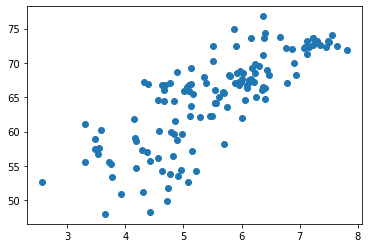

In [164]:
# Write your code here
import matplotlib.pyplot as plt
x = df_1.happiness_score
y = df_1.healthy_life_expectancy
plt.scatter(x, y)

#could have used pandas directly to plot it: 
#country_features.plot(x="happiness_score", y="healthy_life_expectancy", kind="scatter")

Feel free to continue the exploration of the dataset! We'll release the solutions next week.

----
Enjoy EPFL and be happy, next year Switzerland must be #1.